In [ ]:
# Atividade Prática – EDA e Viz do Campeonato Brasileiro

## Análise de Jogos de Futebol 

#### Objetivo: Analisar os dados do Campeonato Brasileiro e outros (8.453 jogos, 2003-2024) para extrair insights que orientem decisões sobre clubes e jogos

## 1. Estatísticas Descritivas e Visualizações Básicas

- 1. Distribuição de gols:
- 2. Mando de campo
- 3. Público
- 4. Respostas

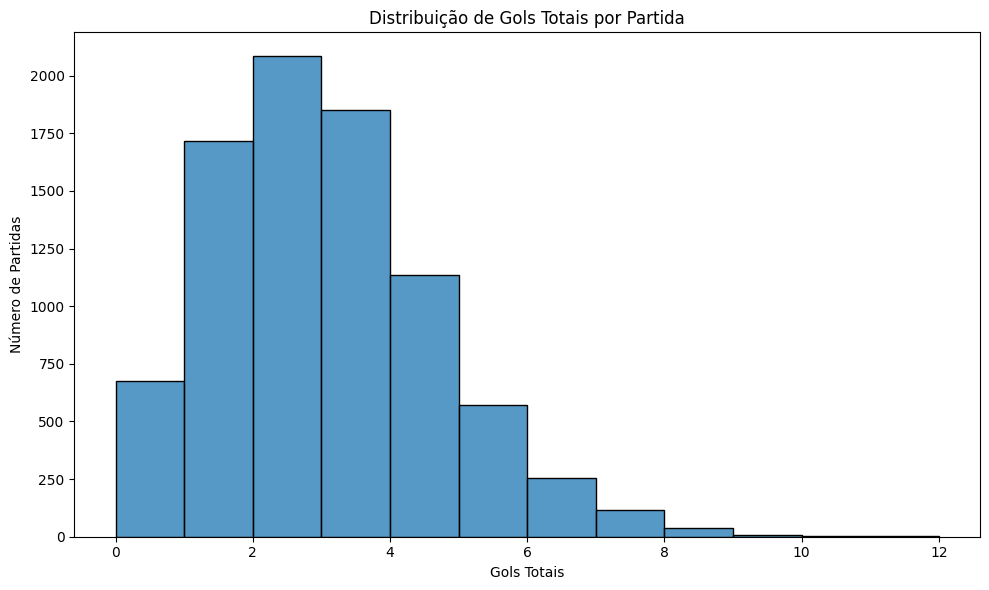

In [ ]:
# 1.1 Carregamento do arquivo CSV
import pandas as pd
import numpy as np
import matplotlib . pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('futebol.csv')
# TODO: Crie coluna gols_total = gols_mandante + gols_visitante

df['gols_total'] = df['gols_mandante'] + df['gols_visitante']

# TODO: Histograma da distribuição de gols totais

plt.figure(figsize=(10, 6))
sns.histplot(df['gols_total'], bins=range(0, int(df['gols_total'].max()) + 2), kde=False)
plt.title('Distribuição de Gols Totais por Partida')
plt.xlabel('Gols Totais')
plt.ylabel('Número de Partidas')
plt.tight_layout()
plt.show()

# TODO: Calcule: média, mediana, moda, desvio padrão, IQR
media_gols = df['gols_total'].mean()
mediana_gols = df['gols_total'].median()
moda_gols = df['gols_total'].mode()[0]
desvio_padrao_gols = df['gols_total'].std()
iqr_gols = stats.iqr(df['gols_total'])

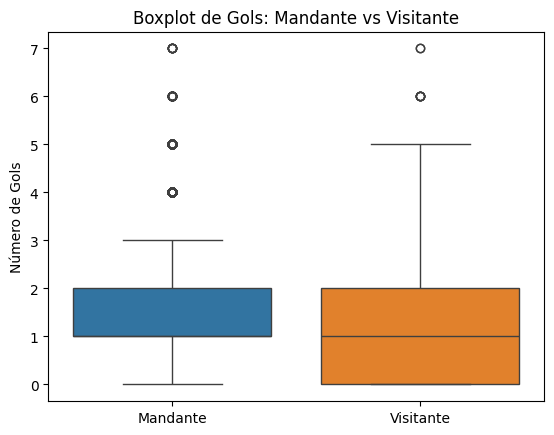

Comparação - Gols Mandante vs Visitante
Média Mandante: 1.53
Mediana Mandante: 1.0
Moda Mandante: 1.0

Média Visitante: 1.02
Mediana Visitante: 1.0
Moda Visitante: 0.0



In [4]:
# 1.2 Mando de campo
# TODO: Boxplots: gols mandante vs visitante
sns.boxplot(data=df[['gols_mandante', 'gols_visitante']])
plt.title('Boxplot de Gols: Mandante vs Visitante') 
plt.ylabel('Número de Gols')
plt.xticks([0, 1], ['Mandante', 'Visitante'])
plt.show()
# TODO: Identifique e interprete outliers

# Mandante: valores acima de 3 gols são considerados outliers, ou seja,
# partidas com 4, 5, 6 e até 7 gols do mandante são eventos raros em relação à maioria dos jogos
# Visitante: valores acima de 5 gols são considerados outliers,
# dá pra interpretar que é mais comum os visitantes marcarem mais de 3 gols em comparação com os mandantes,
# e que goleadas com mais de 5 gols são eventos raros em relação à maioria dos jogos

# TODO: Compare medidas de tendência central
media_mandante = df['gols_mandante'].mean()
mediana_mandante = df['gols_mandante'].median()
moda_mandante = df['gols_mandante'].mode()[0]
media_visitante = df['gols_visitante'].mean()
mediana_visitante = df['gols_visitante'].median()
moda_visitante = df['gols_visitante'].mode()[0]

print("Comparação - Gols Mandante vs Visitante")

print(f"Média Mandante: {media_mandante:.2f}")
print(f"Mediana Mandante: {mediana_mandante}")
print(f"Moda Mandante: {moda_mandante}\n")

print(f"Média Visitante: {media_visitante:.2f}")
print(f"Mediana Visitante: {mediana_visitante}")
print(f"Moda Visitante: {moda_visitante}\n")



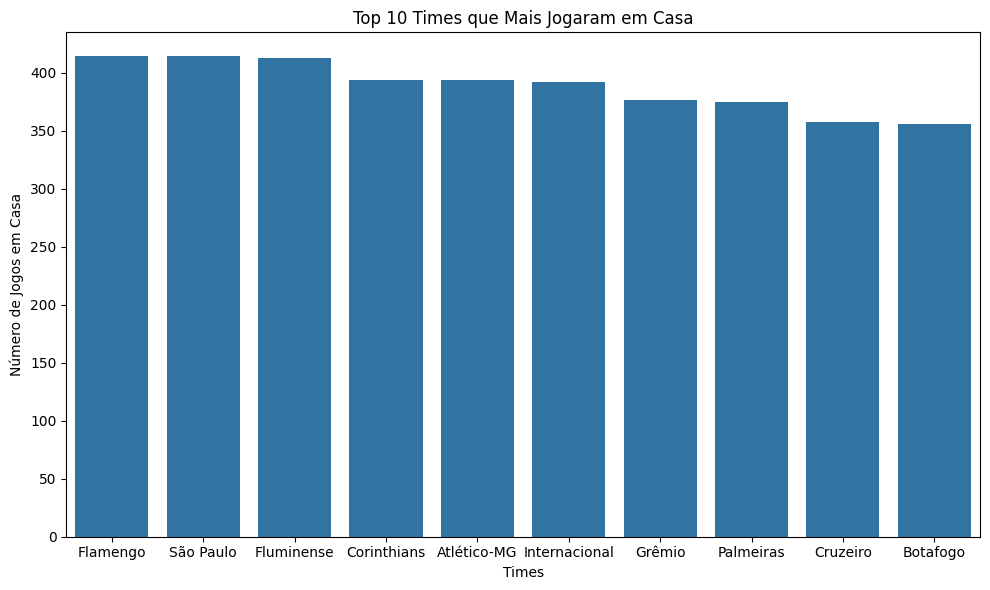

count     6742.000000
mean     16189.951943
std      14074.412391
min          0.000000
25%       5898.250000
50%      12685.500000
75%      22963.250000
max      82044.000000
Name: publico, dtype: float64


In [18]:
# 1.3 Público
# TODO: Gráfico de barras: 10 times que mais jogaram em casa
top_10_times = df['time_mandante'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_times.index, y=top_10_times.values)
plt.title('Top 10 Times que Mais Jogaram em Casa')
plt.xlabel('Times')
plt.ylabel('Número de Jogos em Casa')
plt.tight_layout()
plt.show()

# TODO: Estatísticas descritivas do público (dados não-nulos)
publico_stats = df['publico'].dropna().describe()
print(publico_stats)

## 2. Limpeza e Transformação

### Objetivos desta seção:
- Converter colunas para tipos numéricos apropriados
- Criar nova coluna de lucro
- Padronizar nomes das colunas

In [17]:
# 2.1 Conversão de tipos de dados

# TODO: Crie uma função para converter duration (ex: "1h 38m" -> 98 minutos)
def convert_duration(duration):
    if pd.isnull(duration):
        return np.nan
    parts = duration.split()
    minutos = 0
    for part in parts:
        if 'h' in part:
            minutos += int(part.replace('h', '')) * 60
        elif 'm' in part:
            minutos += int(part.replace('m', ''))
    return minutos

# TODO: Aplique as conversões usando pd.to_numeric() com errors='coerce':
# - year para numérico
# - duration_minutes usando a função criada
# - rating_imdb para numérico
# - vote para numérico
# - budget para numérico
# - gross_world_wide para numérico
# - gross_us_canada para numérico
# - oscar para numérico
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['duration_minutes'] = df['duration'].apply(convert_duration)
df['rating_imdb'] = pd.to_numeric(df['rating_imdb'], errors='coerce')
df['vote'] = pd.to_numeric(df['vote'], errors='coerce')
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['gross_world_wide'] = pd.to_numeric(df['gross_world_wide'], errors='coerce')
df['gross_us_canada'] = pd.to_numeric(df['gross_us_canada'], errors='coerce')
df['oscar'] = pd.to_numeric(df['oscar'], errors='coerce')
# TODO: Exiba uma amostra das conversões realizadas
print(df[['year', 'duration_minutes', 'rating_imdb', 'vote', 'budget', 'gross_world_wide', 'gross_us_canada', 'oscar']].head())

   year  duration_minutes  rating_imdb     vote  budget  gross_world_wide  \
0  1975              98.0          5.6  33000.0     NaN               NaN   
1  1975              90.0          5.6  31000.0     NaN               NaN   
2  1975              90.0          4.9    487.0     NaN               NaN   
3  1975             109.0          6.1  23000.0     NaN               NaN   
4  1975              75.0          4.0    185.0     NaN               NaN   

   gross_us_canada  oscar  
0              NaN      0  
1              NaN      0  
2              NaN      0  
3        5000000.0      1  
4              NaN      0  


In [18]:
# 2.2 Criação da coluna profit
# TODO: Crie a coluna 'profit' = gross_world_wide - budget
df["profit"] = df["gross_world_wide"] - df["budget"]
# TODO: Exiba estatísticas da nova coluna (quantos filmes têm dados de lucro, etc.)
filmes_com_lucro = df["profit"].notnull().sum()
print(filmes_com_lucro)


9406


In [19]:
# 2.3 Padronização dos nomes das colunas
# TODO: Padronize os nomes das colunas (minúsculas, sem espaços, substituir por _)
df.columns = (
    df.columns.str.strip()
             .str.lower()      
             .str.replace(" ", "_")
)

# TODO: Exiba os nomes das colunas após padronização
print(df.columns)

Index(['id', 'title', 'link', 'year', 'duration', 'rating_mpa', 'rating_imdb',
       'vote', 'budget', 'gross_world_wide', 'gross_us_canada',
       'gross_opening_weekend', 'director', 'writer', 'star', 'genre',
       'country_origin', 'filming_location', 'production_company', 'language',
       'win', 'nomination', 'oscar', 'duration_minutes', 'profit'],
      dtype='object')


## 3. Exploração e Agregação

### Objetivos desta seção:
- Identificar filmes com maiores notas IMDb
- Calcular estatísticas por década
- Encontrar o melhor diretor
- Identificar gênero mais comum

In [13]:
# 3.1 Top 5 filmes com maior nota IMDb
# TODO: Use sort_values() para ordenar por 'rating_imdb' (decrescente)
sorted_df = df.sort_values(by='rating_imdb', ascending=False)
# TODO: Selecione os primeiros 5 filmes
top5filmes = sorted_df[['title', 'rating_imdb']]
print(top5filmes.head(5))
# TODO: Exiba colunas relevantes: title, year, rating_imdb, vote, director, genre
print(sorted_df[['title', 'year', 'rating_imdb', 'vote', 'director', 'genre']].head())

                                                title  rating_imdb
11166                         Day by Day: The Dynasty          9.6
20986                                Love Goes Public          9.6
12225                                   Water Brother          9.5
14532  SEVENTEEN TOUR 'FOLLOW' to JAPAN: LIVE VIEWING          9.5
27302                        The Cowboy and the Queen          9.4
                                                title  year  rating_imdb  \
11166                         Day by Day: The Dynasty  2023          9.6   
20986                                Love Goes Public  2019          9.6   
12225                                   Water Brother  2024          9.5   
14532  SEVENTEEN TOUR 'FOLLOW' to JAPAN: LIVE VIEWING  2023          9.5   
27302                        The Cowboy and the Queen  2023          9.4   

       vote                         director                   genre  
11166   9.0                   Justin Le Pera             Documentary  

In [20]:
# 3.2 Média de duração por década
# TODO: Crie uma coluna 'decade' usando (year // 10) * 10
df['decade'] = (df['year'] // 10) * 10
# TODO: Use groupby('decade') para calcular a média de 'duration_minutes'
media_duracao = df.groupby('decade')['duration_minutes'].mean()
# TODO: Exiba os resultados
print(media_duracao)
# TODO: EXTRA - Calcule outras estatísticas por década:
# - Média de rating_imdb por década
# - Média de votos por década  
# - Quantidade de filmes por década
estatisticas_decada = df.groupby('decade').agg({

    'rating_imdb': 'mean',       # média do rating
    'vote': 'mean',              # média de votos
    'title': 'count'             # quantidade de filmes
})
print(estatisticas_decada)


decade
1960     99.709957
1970    100.384062
1980    101.817836
1990    103.887324
2000    103.673278
2010    106.652791
2020    107.420254
Name: duration_minutes, dtype: float64
        rating_imdb           vote  title
decade                                   
1960       6.179788   12085.734954   5149
1970       5.935427   27782.298211   5050
1980       5.913377   36688.839197   5050
1990       6.047076  107496.141570   5001
2000       6.335423  110709.429266   5349
2010       6.457151  114801.467707   5151
2020       6.234367   41643.711315   2850


In [21]:
# 3.3 Diretor com maior média de nota IMDb (mínimo 3 filmes)
# TODO: Use groupby('director') para agrupar por diretor
# TODO: Calcule estatísticas: média de rating_imdb, contagem de filmes, lista de títulos
estatisticas_diretor = df.groupby('director').agg(
    media_rating=('rating_imdb', 'mean'),
    qtd_filmes=('title', 'count'),
    titulos=('title', lambda x: list(x))
)
# TODO: Filtre apenas diretores com 3 ou mais filmes
estatisticas_diretor = estatisticas_diretor[estatisticas_diretor['qtd_filmes'] >= 3]

# TODO: Ordene por nota média (decrescente)
estatisticas_diretor = estatisticas_diretor.sort_values(by='media_rating', ascending=False)

# TODO: Exiba o top 10 e identifique o melhor diretor
top10_diretores = estatisticas_diretor.head(10)
print(top10_diretores)




                           media_rating  qtd_filmes  \
director                                              
Jim Brown                      8.633333           3   
Sachin Pilgaonkar              8.533333           3   
Upendra                        8.514286           7   
Slobodan Sijan                 8.500000           3   
Kamalakara Kameshwara Rao      8.433333           3   
Moustapha Akkad                8.400000           3   
Mircea Dragan                  8.400000           5   
Sam Wrench                     8.400000           3   
Bharathan                      8.300000           4   
Srdjan Dragojevic              8.300000           3   

                                                                     titulos  
director                                                                      
Jim Brown                  [The Weavers: Wasn't That a Time, Isn't This a...  
Sachin Pilgaonkar          [Atmavishwas, Ashi Hi Banwa Banwi, Aayatya Gha...  
Upendra                

In [22]:
# 3.4 Gênero mais recorrente no dataset
# TODO: Separar gêneros combinados (ex: "Drama, Romance" -> ["Drama", "Romance"])
df['genre_list'] = df['genre'].str.split(', ')
# TODO: Criar uma lista com todos os gêneros individuais
todos_generos = df['genre_list'].explode()
# TODO: Use pd.Series().value_counts() para contar frequências
contagem_generos = pd.Series(todos_generos).value_counts()
# TODO: Exiba o top 10 gêneros com percentuais
total = contagem_generos.sum()
top10_generos = contagem_generos.head(10)
percentuais = (top10_generos / total * 100).round(2)

resultado_top10 = pd.DataFrame({
    'contagem': top10_generos,
    'percentual': percentuais
})
print(resultado_top10)

# TODO: Identifique o gênero mais recorrente
genero_mais_recorrente = contagem_generos.idxmax()
print(genero_mais_recorrente)

            contagem  percentual
genre_list                      
Drama          18343       17.64
Comedy         11021       10.60
Thriller        6873        6.61
Romance         6451        6.20
Action          5472        5.26
Crime           5180        4.98
Horror          4024        3.87
Adventure       3870        3.72
Mystery         2835        2.73
Fantasy         2591        2.49
Drama
